#  Mexico Toy Analysis

## 1.Import Nessesary Libraries

In [1]:
import glob
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
plt.style.use('seaborn-darkgrid')

## 2. Load Dataset

In [3]:
files = glob.glob('Dataset/*.csv')
files

['Dataset\\inventory.csv',
 'Dataset\\products.csv',
 'Dataset\\sales.csv',
 'Dataset\\stores.csv']

In [4]:
inventory = pd.read_csv('Dataset\\inventory.csv')
products = pd.read_csv('Dataset\\products.csv')
sales = pd.read_csv('Dataset\\sales.csv')
stores = pd.read_csv('Dataset\\stores.csv')

In [5]:
inventory.sample()

,Store_ID,Product_ID,Stock_On_Hand
124,4,32,6


In [6]:
products.sample()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
4,5,Classic Dominoes,Games,$7.99,$9.99


In [7]:
sales.sample()

,Sale_ID,Date,Store_ID,Product_ID,Units
220448,220449,2017-07-21,47,31,3


In [8]:
stores.sample()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
36,37,Maven Toys Ciudad de Mexico 3,Cuidad de Mexico,Residential,2013-11-28


### 3. Join Dataset Files 

In [24]:
df = pd.merge(sales, stores, how = 'outer', on = 'Store_ID')
df = pd.merge(df, products, how = 'outer', on = 'Product_ID')
data = pd.merge(df, inventory, how = 'outer', on = ['Product_ID', 'Store_ID'])

In [25]:
data.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
1,66.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
2,98.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
3,128.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
4,146.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0


In [10]:
#data.to_csv('Sales.csv', index = False)

In [5]:
data.shape

(829265, 14)

In [6]:
data.columns

Index(['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date', 'Product_Name',
       'Product_Category', 'Product_Cost', 'Product_Price', 'Stock_On_Hand'],
      dtype='object')

##  4. Data Cleaning

### 4.1. Checking Null Values

In [26]:
data.isna().sum()

Sale_ID                3
Date                   3
Store_ID               0
Product_ID             0
Units                  3
Store_Name             3
Store_City             3
Store_Location         3
Store_Open_Date        3
Product_Name           3
Product_Category       3
Product_Cost           3
Product_Price          3
Stock_On_Hand       6232
dtype: int64

In [14]:
#6232/829265

0.007515088662852044

In [27]:
data = data.dropna()

In [28]:
data.shape

(823030, 14)

In [29]:
data.isna().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Stock_On_Hand       0
dtype: int64

### 4.2. Checking Duplicates 

In [30]:
data.duplicated().sum()

0

## 5. EDA 

### Extract day, month and year from date

In [31]:
data.dtypes

Sale_ID             float64
Date                 object
Store_ID              int64
Product_ID            int64
Units               float64
Store_Name           object
Store_City           object
Store_Location       object
Store_Open_Date      object
Product_Name         object
Product_Category     object
Product_Cost         object
Product_Price        object
Stock_On_Hand       float64
dtype: object

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

In [33]:
data.dtypes

Sale_ID                    float64
Date                datetime64[ns]
Store_ID                     int64
Product_ID                   int64
Units                      float64
Store_Name                  object
Store_City                  object
Store_Location              object
Store_Open_Date             object
Product_Name                object
Product_Category            object
Product_Cost                object
Product_Price               object
Stock_On_Hand              float64
dtype: object

In [34]:
data['Sales_Day'] = data['Date'].dt.day_name()
data['Sales_Month'] = data['Date'].dt.month_name()
data['Sales_Year'] = data['Date'].dt.year

In [11]:
data.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
1,66.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
2,98.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
3,128.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
4,146.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0


In [35]:
data['Product_Cost'] = data['Product_Cost'].str.lstrip('$').astype(float)
data['Product_Price'] = data['Product_Price'].str.lstrip('$').astype(float)

In [36]:
# Cost
data['Cost'] = data['Product_Cost'] * data['Units']

# Price
data['Price'] = data['Product_Price'] * data['Units']

#### I will add new column that calculate the profit 

In [37]:
data['Profit'] = data['Price'] - data['Cost']

In [38]:
data.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,Sales_Day,Sales_Month,Sales_Year,Cost,Price,Profit
0,1.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,Sunday,January,2017,9.99,12.99,3.0
1,66.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,Sunday,January,2017,9.99,12.99,3.0
2,98.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,Sunday,January,2017,9.99,12.99,3.0
3,128.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,Sunday,January,2017,9.99,12.99,3.0
4,146.0,2017-01-01,24,4,1.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,Sunday,January,2017,9.99,12.99,3.0


In [17]:
data.to_csv('Sales_toy_analysis.csv', index = False)

### Q1. What is the product category that achieve maximum profit ? 

In [39]:
max_profit = data['Profit'].max()
print("Maximum profit is ",max_profit)

Maximum profit is  149.99999999999997


In [40]:
Product_Category = data['Product_Category'][data['Profit'] == max_profit ].unique()
print("Product Category that achieved maximum profit is ", Product_Category)

Product Category that achieved maximum profit is  ['Games']


### Q2. Is maximum profit achieved in all locations ?  

In [41]:
data['Store_Location'].unique()

array(['Downtown', 'Commercial', 'Residential', 'Airport'], dtype=object)

In [42]:
Store_Location = data['Store_Location'][data['Profit'] == max_profit ].unique()
print("Store Location that achieved maximum profit is ", Store_Location)

Store Location that achieved maximum profit is  ['Downtown']


### Q3. What is the total profit for each location ?

In [43]:
Profit_by_location = data['Profit'].groupby(data['Store_Location']).sum()
print(Profit_by_location)
values = Profit_by_location.values
print("Profit by location values are ", values )

Store_Location
Airport         371182.0
Commercial      916257.0
Downtown       2221455.0
Residential     458435.0
Name: Profit, dtype: float64
Profit by location values are  [ 371182.  916257. 2221455.  458435.]


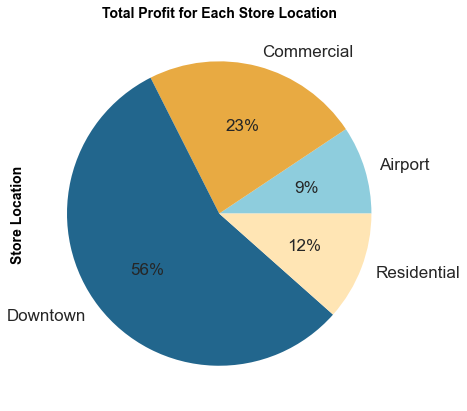

In [44]:
plt.figure(figsize=(14,7))

colors = ['#8ECDDD','#E8AA42','#22668D', '#FFE5B4']
plt.pie(Profit_by_location.values, labels=Profit_by_location.index , colors=colors, autopct='%.0f%%', textprops={'size':17})
        #explode=(0.02, 0.02, 0.02, 0.02))
plt.ylabel('Store Location', fontweight="bold", fontsize = 14, color = 'black' )
plt.title('Total Profit for Each Store Location', fontweight="bold", fontsize = 14, color = 'black' )
plt.show()

### Q4. What is the total profit for each city ?

In [29]:
# the number of store cites
data['Store_City'].nunique()

29

In [45]:
total_Profit_by_city= data['Profit'].groupby(data['Store_City']).sum().sort_values( ascending = False)
Profit_by_city= data.groupby(data['Store_City'])[['Profit']].agg(['sum', 'mean'])

# create dataframe for the result
#columns_names = ['sum', 'mean']
#df = pd.DataFrame(Profit_by_city,  columns=columns_names)
#df
Profit_by_city

Profit          
                       sum      mean
Store_City                          
Aguascalientes     68642.0  4.705374
Campeche          146339.0  4.798000
Chetumal           67940.0  4.639443
Chihuahua         146868.0  4.803061
Chilpancingo       65291.0  4.522164
Ciudad Victoria    81912.0  5.162738
Cuernavaca         54425.0  4.081365
Cuidad de Mexico  459153.0  5.103458
Culiacan           63959.0  4.382554
Durango            61672.0  4.415551
Guadalajara       362728.0  4.933799
Guanajuato        234921.0  4.774623
Hermosillo        263174.0  5.287485
La Paz             55406.0  4.287063
Merida             64399.0  4.329345
Mexicali          173235.0  5.156417
Monterrey         343209.0  4.983215
Morelia            90484.0  6.050013
Oaxaca             57987.0  4.219999
Pachuca            63989.0  4.274768
Puebla            226985.0  4.821364
Saltillo          163248.0  4.933454
San Luis Potosi    68880.0  4.444158
Santiago           71165.0  4.483399
Toluca            155937.0  4.409235
Tuxtla Gutierrez   64531.0  4.468596
Villahermosa       74221.0  4.546741
Xalapa            159128.0  4.794890
Zacatecas          57501.0  4.335118

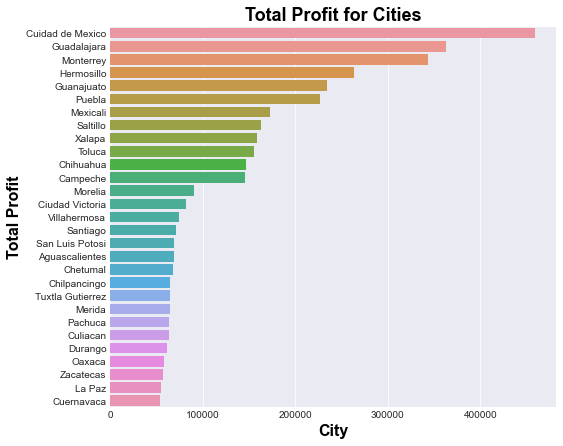

In [46]:
plt.figure(figsize=(8,7))
sns.barplot(x=total_Profit_by_city.values, y= total_Profit_by_city.index, orient="h")
plt.xlabel('City', fontweight="bold", fontsize = 16, color = 'black' )
plt.ylabel('Total Profit', fontweight="bold", fontsize = 16, color = 'black' )
plt.title('Total Profit for Cities', fontweight="bold", fontsize = 18, color = 'black' )
plt.show()

### Q5. What is the total  profit by year ?

In [47]:
total_profit_year = data['Profit'].groupby(data['Sales_Year']).sum()
total_profit_year

Sales_Year
2017    2160416.0
2018    1806913.0
Name: Profit, dtype: float64

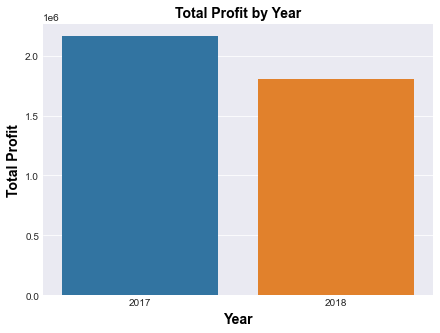

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(x=total_profit_year.index, y=total_profit_year.values)
plt.xlabel('Year', fontweight="bold", fontsize = 14, color = 'black' )
plt.ylabel('Total Profit', fontweight="bold", fontsize = 14, color = 'black' )
plt.title('Total Profit by Year', fontweight="bold", fontsize = 14, color = 'black' )
plt.show()

### Q6. What is the total profit by year for each store location ?

In [49]:
#total profit by year for Downtown
profit_by_year_downtown = data['Profit'][data['Store_Location'] == 'Downtown'].groupby(data['Sales_Year']).sum()
profit_by_year_downtown

Sales_Year
2017    1201296.0
2018    1020159.0
Name: Profit, dtype: float64

In [50]:
#total profit by year for 'Commercial'
profit_by_year_commercial = data['Profit'][data['Store_Location'] == 'Commercial'].groupby(data['Sales_Year']).sum()
profit_by_year_commercial

Sales_Year
2017    510375.0
2018    405882.0
Name: Profit, dtype: float64

In [51]:
#total profit by year for 'Residential'
profit_by_year_residential = data['Profit'][data['Store_Location'] == 'Residential'].groupby(data['Sales_Year']).sum()
profit_by_year_residential

Sales_Year
2017    248180.0
2018    210255.0
Name: Profit, dtype: float64

In [52]:
#total profit by year for 'Airport'
profit_by_year_airport= data['Profit'][data['Store_Location'] == 'Airport'].groupby(data['Sales_Year']).sum()
profit_by_year_airport

Sales_Year
2017    200565.0
2018    170617.0
Name: Profit, dtype: float64

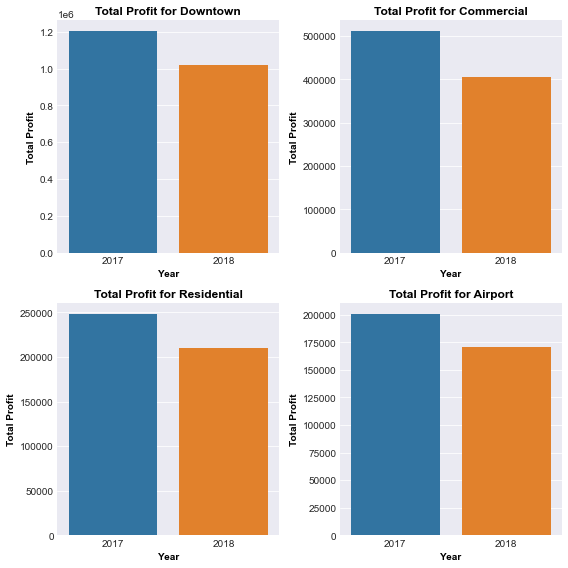

In [53]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(8,8))

sns.barplot(ax=axis[0,0] ,x=profit_by_year_downtown.index, y=profit_by_year_downtown.values)
axis[0,0].set_title('Total Profit for Downtown', fontweight="bold", fontsize = 12, color = 'black')
axis[0,0].set_xlabel('Year', fontweight="bold", fontsize = 10, color = 'black')
axis[0,0].set_ylabel('Total Profit', fontweight="bold", fontsize = 10, color = 'black')

sns.barplot(ax=axis[0,1],x=profit_by_year_commercial.index, y=profit_by_year_commercial.values)
axis[0,1].set_title('Total Profit for Commercial',fontweight="bold", fontsize = 12, color = 'black')
axis[0,1].set_xlabel('Year',fontweight="bold", fontsize = 10, color = 'black')
axis[0,1].set_ylabel('Total Profit',fontweight="bold", fontsize = 10, color = 'black')

sns.barplot(ax=axis[1,0],x=profit_by_year_residential.index, y=profit_by_year_residential.values)
axis[1,0].set_title('Total Profit for Residential', fontweight="bold", fontsize = 12, color = 'black')
axis[1,0].set_xlabel('Year', fontweight="bold", fontsize = 10, color = 'black')
axis[1,0].set_ylabel('Total Profit', fontweight="bold", fontsize = 10, color = 'black')

sns.barplot(ax=axis[1,1], x=profit_by_year_airport.index, y=profit_by_year_airport.values)
axis[1,1].set_title('Total Profit for Airport', fontweight="bold", fontsize = 12, color = 'black')
axis[1,1].set_xlabel('Year', fontweight="bold", fontsize = 10, color = 'black')
axis[1,1].set_ylabel('Total Profit',fontweight="bold", fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

### Q7. What is the total profit by month ?

In [54]:
#total_profit_by_month = data['Product_Profit'].groupby(data['Sales_Month']).sum()
#total_profit_by_month
total_profit_by_month = data.groupby(data['Sales_Month'])['Profit'].sum().sort_values(ascending=False)
total_profit_by_month

Sales_Month
March        403349.0
April        402718.0
May          391935.0
June         390784.0
July         380004.0
January      368737.0
February     349327.0
September    343489.0
August       328698.0
December     242133.0
November     190939.0
October      175216.0
Name: Profit, dtype: float64

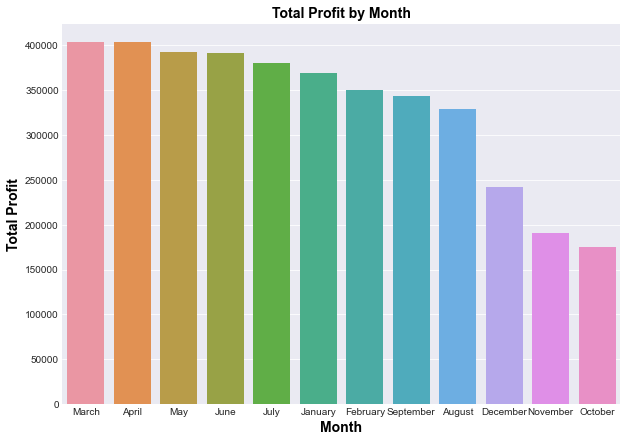

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(x=total_profit_by_month.index, y=total_profit_by_month.values)
plt.xlabel('Month', fontweight="bold", fontsize = 14, color = 'black' )
plt.ylabel('Total Profit', fontweight="bold", fontsize = 14, color = 'black' )
plt.title('Total Profit by Month', fontweight="bold", fontsize = 14, color = 'black' )
plt.show()

In [56]:
# minimum total profit by month
min_profit = data['Profit'].groupby(data['Sales_Month']).sum().min()
print("Minimum Profit is ",min_profit)
# maximum total profit by month
max_profit = data['Profit'].groupby(data['Sales_Month']).sum().max()
print("Maximum Profit is ",max_profit)

Minimum Profit is  175216.0
Maximum Profit is  403349.0


### Q8. What is total profit by day ?

In [73]:
total_profit_by_day = data.groupby('Sales_Day')['Profit'].sum().sort_values(ascending=False)
total_profit_by_day

Sales_Day
Sunday       762855.0
Saturday     732657.0
Friday       601992.0
Monday       498798.0
Thursday     480792.0
Wednesday    454877.0
Tuesday      435358.0
Name: Profit, dtype: float64

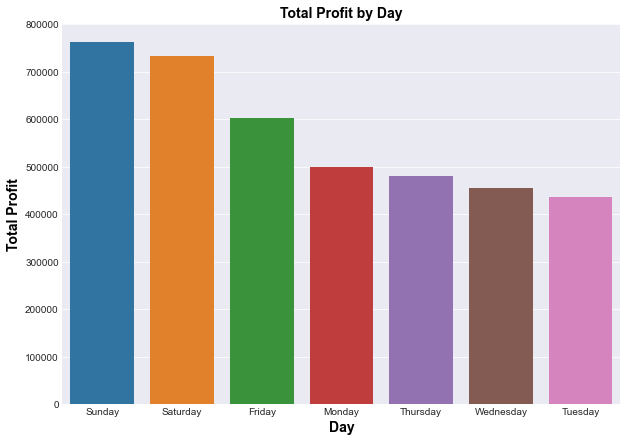

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x= total_profit_by_day.index, y=total_profit_by_day.values )
plt.xlabel('Day', fontweight="bold", fontsize = 14, color = 'black' )
plt.ylabel('Total Profit', fontweight="bold", fontsize = 14, color = 'black' )
plt.title('Total Profit by Day', fontweight="bold", fontsize = 14, color = 'black' )
plt.show()

### Q9. What is the most sold product category ? 

In [57]:
category_counts = data['Product_Category'].value_counts()
category_counts

Toys                 221161
Art & Crafts         220673
Games                150937
Sports & Outdoors    131234
Electronics           99025
Name: Product_Category, dtype: int64

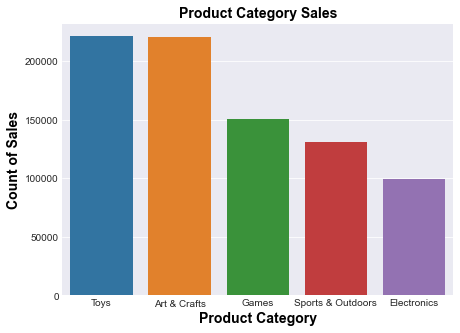

In [58]:
plt.figure(figsize=(7,5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Product Category', fontweight="bold", fontsize = 14, color = 'black' )
plt.ylabel('Count of Sales', fontweight="bold", fontsize = 14, color = 'black' )
plt.title('Product Category Sales', fontweight="bold", fontsize = 14, color = 'black' )
plt.show()

### Q10. What is the most sold product category for each store location ?  

In [59]:
category_downtown = data['Product_Category'][data['Store_Location'] == 'Downtown'].value_counts()
category_downtown 

Art & Crafts         132474
Toys                 130214
Games                 85275
Sports & Outdoors     76217
Electronics           52341
Name: Product_Category, dtype: int64

In [60]:
category_residential = data['Product_Category'][data['Store_Location'] == 'Residential'].value_counts()
category_residential

Toys                 27267
Art & Crafts         25948
Games                17150
Sports & Outdoors    14963
Electronics          10293
Name: Product_Category, dtype: int64

In [61]:
category_airport = data['Product_Category'][data['Store_Location'] == 'Airport'].value_counts()
category_airport

Toys                 17227
Art & Crafts         16537
Games                14070
Sports & Outdoors    10633
Electronics           9178
Name: Product_Category, dtype: int64

In [62]:
category_commercial = data['Product_Category'][data['Store_Location'] == 'Commercial'].value_counts()
category_commercial

Toys                 46453
Art & Crafts         45714
Games                34442
Sports & Outdoors    29421
Electronics          27213
Name: Product_Category, dtype: int64

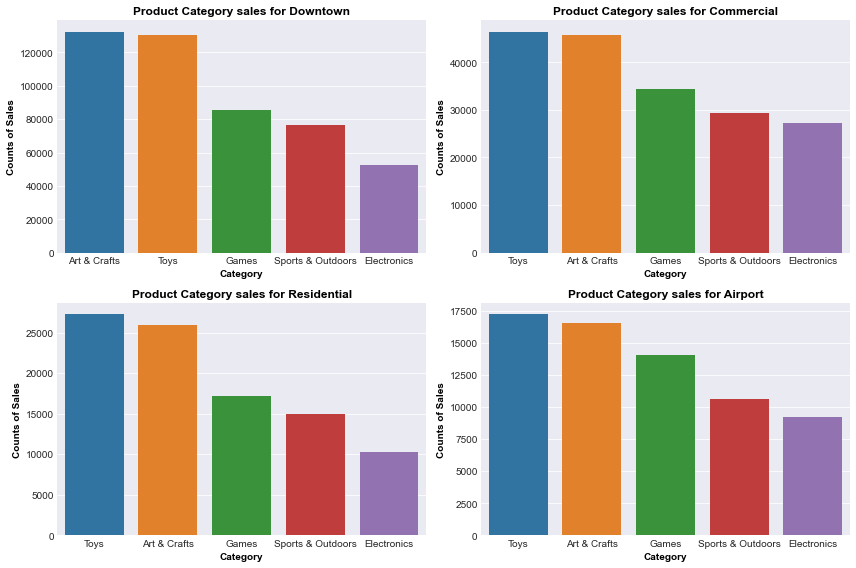

In [63]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

sns.barplot(ax=axis[0,0] ,x=category_downtown.index, y=category_downtown.values)
axis[0,0].set_title('Product Category sales for Downtown', fontweight="bold", fontsize = 12, color = 'black')
axis[0,0].set_xlabel('Category', fontweight="bold", fontsize = 10, color = 'black')
axis[0,0].set_ylabel('Counts of Sales', fontweight="bold", fontsize = 10, color = 'black')

sns.barplot(ax=axis[0,1],x=category_commercial.index, y=category_commercial.values)
axis[0,1].set_title('Product Category sales for Commercial',fontweight="bold", fontsize = 12, color = 'black')
axis[0,1].set_xlabel('Category',fontweight="bold", fontsize = 10, color = 'black')
axis[0,1].set_ylabel('Counts of Sales', fontweight="bold",fontsize = 10, color = 'black')

sns.barplot(ax=axis[1,0],x=category_residential.index, y=category_residential.values)
axis[1,0].set_title('Product Category sales for Residential', fontweight="bold", fontsize = 12, color = 'black')
axis[1,0].set_xlabel('Category', fontweight="bold", fontsize = 10, color = 'black')
axis[1,0].set_ylabel('Counts of Sales', fontweight="bold", fontsize = 10, color = 'black')

sns.barplot(ax=axis[1,1], x=category_airport.index, y=category_airport.values)
axis[1,1].set_title('Product Category sales for Airport', fontweight="bold", fontsize = 12, color = 'black')
axis[1,1].set_xlabel('Category', fontweight="bold", fontsize = 10, color = 'black')
axis[1,1].set_ylabel('Counts of Sales',fontweight="bold", fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()